In [284]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import my_functions
sns.set()

In [285]:
data=pd.read_csv('Sharks_attacks_cleaned.csv')
data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal,Time,Investigator or Source
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57.0,"No injury to occupant, outrigger canoe and pad...",N,afternoon,"R. Collier, GSAF"
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11.0,Minor injury to left thigh,N,afternoon,"K.McMurray, TrackingSharks.com"
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48.0,Injury to left lower leg from surfboard skeg,N,morning,"K.McMurray, TrackingSharks.com"
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,Minor injury to lower leg,N,NaN,"B. Myatt, GSAF"
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,A .Kipper


# Hypothesis 1: Most of the provoked shark attacks are by Americans

Our approach will be create a different dataframe that only records provoked cases of shark attacks and the compare it with the total number of sharks attacks registered for each country.

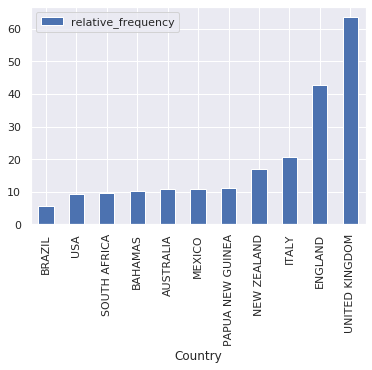

In [286]:
list1=list(dict(data.Country.loc[data.Type=='Provoked'].value_counts()).keys())
list2=list(dict(data.Country.loc[data.Type=='Provoked'].value_counts()).values())

dictionary=dict(data.Country.value_counts())
          
                
df=pd.DataFrame(data=[list1,list2],index=['Country','total_cases']).T



busqueda_población(df,dictionary)

df['relative_frequency']=df.total_cases/df.Total_population_of_country*100

df=df.sort_values(by='relative_frequency')
df[df.total_cases>4].plot.bar(x='Country',y='relative_frequency')



In [287]:
df.relative_frequency.mean()

33.33684851754672

Hypothesis: Most of the provoked shark attacks are by Americans proves to be wrong. The country with a significative number of registered cases (above 4) have a mean value around 0.1. The increment in the total mean value is due to the contribution of England and United Kingdom, which have a clearly bigger frequency of provoked cases

# Hypothesis 2: Australian sharks are the most letal. 

In [288]:

list1=list(dict(data.Country.loc[data.Fatal=='Y'].value_counts()).keys())
list2=list(dict(data.Country.loc[data.Fatal=='Y'].value_counts()).values())

df=pd.DataFrame(data=[list1,list2],index=['Country','total_fatal_cases']).T

busqueda_población(df,dictionary)

df['relative_incidence']=df.total_fatal_cases/df.Total_population_of_country*100
df=df.sort_values(by='relative_incidence', ascending=False)

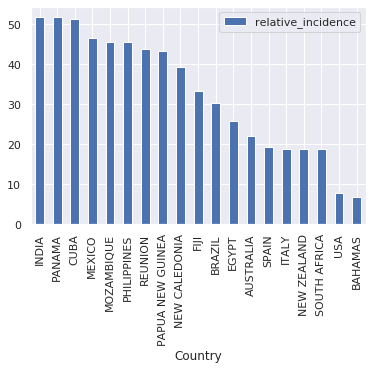

In [289]:
df[df.Total_population_of_country>25].plot.bar(x='Country',y='relative_incidence')

Hypothesis 2: Australian sharks are the most letal is wrong. India, Panama, Cuba and Mexico has clearly a higher frequency of fatal sharks attacks between countrys with more than 25 registered attacks. 

## Hypothesis 3: Sharks tends to attack  in the afternoon

In [290]:
df=data[data.Time!='NaN']

list1=list(dict(data.Time.loc[data.Time!='Y'].value_counts()).keys())
list2=list(dict(data.Time.loc[data.Time!='Y'].value_counts()).values())

df=pd.DataFrame(data=list2,index=list1, columns=['Fatal cases'])


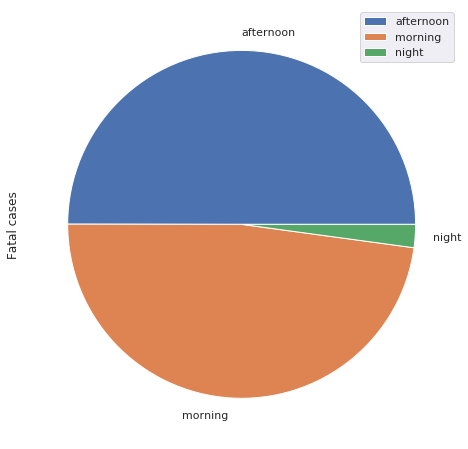

In [282]:
df.plot.pie(y='Fatal cases',figsize=(8,8))

Hypothesis 3: Sharks tends to attack  in the afternoon is True. There are more attacks in the afternoon than in the morning or during the night. Even thought, there is no a big difference in number between attacks in the morning or in the afternoon.